In [71]:
import numpy as np

# generate data

In [72]:
# In real world, you cannot learn how the data was generated. So do not rely on this function when coding your lab.
def generate_data(dim, num):
    x = np.random.normal(0, 10, [num, dim])
    coef = np.random.uniform(-1, 1, [dim, 1])
    pred = np.dot(x, coef)
    pred_n = (pred - np.mean(pred)) / np.sqrt(np.var(pred))
    label = np.sign(pred_n)
    mislabel_value = np.random.uniform(0, 1, num)
    mislabel = 0
    for i in range(num):
        if np.abs(pred_n[i]) < 1 and mislabel_value[i] > 0.9 + 0.1 * np.abs(pred_n[i]):
            label[i] *= -1
            mislabel += 1
    return x, label, mislabel/num

In [73]:
# example
x, y, mr = generate_data(5, 100)

In [74]:
x[:5], y[:5]

(array([[ 12.75145889,  -6.46271   ,   4.50302528,   7.65509648,
         -16.22329524],
        [-13.9108274 ,  11.39728054,  10.22407471,  11.08689238,
           7.46511724],
        [  5.46666618,   4.72502018,  -7.33289671,  18.75575361,
           8.20707451],
        [ -3.00132574,   8.35402788,   5.06539293, -25.4448522 ,
          -0.17515426],
        [ -0.13666507,  -7.25845932,  -4.11526009,  -0.05173363,
          -4.39774339]]),
 array([[-1.],
        [ 1.],
        [ 1.],
        [-1.],
        [-1.]]))

# write your model class

In [75]:
# you can do anything necessary about the model
class SVM1:
    w = []
    b = 0
    C = 1
    epoch = 0

    def __init__(self, dim, C):
        """
        You can add some other parameters, which I think is not necessary
        """
        self.C = C

    def grad(self, X, y):
        wGrad = np.zeros([self.w.shape[0], 1])
        bGrad = 0
        for i in range(y.shape[0]):
            t = 0
            if y[i]*(np.dot(X[i], self.w)+self.b) < 1:
                t = 1
            else:
                t = 0
            wGrad += t*y[i][0]*np.transpose(X[i])
            bGrad += t
        wGrad = - wGrad / y.shape[0]
        bGrad = - bGrad / y.shape[0]
        wGrad += self.C*self.w
        return wGrad, bGrad

    def fit(self, X, y, lr=1, max_iter=500, tol=1e-4):
        """
        Fit the coefficients via your methods
        """
        X = np.asmatrix(X)
        self.w = np.ones([X.shape[1], 1])
        b = 1
        self.epoch = 0
        LR = lr
        while True:
            wGrad, bGrad = self.grad(X, y)
            self.w -= LR * wGrad
            self.b -= LR * bGrad
            self.epoch += 1
            if LR > 0.002:
                LR = lr / self.epoch
            else:
                LR=LR
            if self.epoch > max_iter or (np.abs(wGrad).max() < tol and bGrad < tol):
                return

    def predict(self, X):
        """
        Use the trained model to generate prediction probabilities on a new
        collection of data points.
        """
        pred = np.sign(np.dot(X, self.w) + self.b)
        return pred


In [86]:
# you can do anything necessary about the model
class SVM2:
    w = []
    alpha = []
    C = 1
    epoch = 0

    def __init__(self, dim, C=1.0):
        """
        You can add some other parameters, which I think is not necessary
        """
        self.C = C

    def update(self, X, y, i):
        temp = self.alpha[i][0] - (y[i][0]*np.dot(X[i], self.w)-1) / \
            (np.dot(X[i], np.transpose(X[i])))
        if temp > self.C:
            return self.C
        elif temp <= self.C and temp >= 0:
            #return np.asarray(temp)[0][0]
            return temp
        else:
            return 0

    def fit(self, X, y, max_iter=1e6):
        """
        Fit the coefficients via your methods
        """
        X = np.column_stack((X, np.ones([X.shape[0], 1])))
        #X = np.asmatrix(X)
        #self.w = np.ones([X.shape[1], 1])
        self.alpha = np.zeros([X.shape[0], 1])
        for i in range(y.shape[0]):
            self.w = self.alpha[i][0]*y[i][0]*np.transpose(X[i])
        self.epoch = 0
        while True:
            for i in range(self.alpha.shape[0]):
                temp = self.update(X, y, i)
                self.w += (temp - self.alpha[i][0])*y[i][0]*np.transpose(X[i])
                self.alpha[i][0] = temp
                self.epoch += 1
                if self.epoch > max_iter:
                    return

    def predict(self, X):
        """
        Use the trained model to generate prediction probabilities on a new
        collection of data points.
        """
        X = np.column_stack((X, np.ones([X.shape[0], 1])))
        #X = np.asmatrix(X)
        pred = np.sign(np.dot(X, self.w))
        return pred


# construct and train your models

In [77]:
# generate data
# X_data, y_data, mislabel = generate_data()
dim = [2, 1000]
X_data, y_data, mislabel = generate_data(dim[0], dim[1])
# split data
X_train = X_data[:800]
y_train = y_data[:800]
X_test = X_data[800:1000]
y_test = y_data[800:1000]
mislabel


0.04

In [78]:
# constrcut model and train (remember record time)
# model1 = SVM1()
# model1.fit()
model1 = SVM1(dim, 0.01)
model1.fit(X_train, y_train)


In [79]:
model2 = SVM2(dim, 0.01)
model2.fit(X_train, y_train,max_iter=1e6)

# predict and compare your results

In [80]:
# make prediction
pred1 = model1.predict(X_test)
# compared with answer
count = 0
for i in range(y_test.shape[0]):
    if y_test[i] == pred1[i]:
        count += 1
print(count/y_test.shape[0])
# compare each methods


0.92


In [81]:
# make prediction
pred2 = model2.predict(X_test)
# compared with answer
count = 0
for i in range(y_test.shape[0]):
    if y_test[i] == pred2[i]:
        count += 1
print(count/y_test.shape[0])
# compare each methods

0.92


In [82]:
import sklearn
from sklearn.svm import LinearSVC
linearsvc = LinearSVC(C=1.0, max_iter=1e7)
linearsvc.fit(X_train, y_train.flatten())
pred = linearsvc.predict(X_test)

In [83]:
count = 0
for i in range(y_test.shape[0]):
    if y_test[i] == pred[i]:
        count += 1
print(count/y_test.shape[0])

0.92


In [84]:
'''
import matplotlib.pyplot as plt
x1=[]
x2=[]
i=0
for y in y_data:
    if y==1:
        x1.append(X_data[i])
    else:
        x2.append(X_data[i])
    i+=1
x1=np.transpose(np.array(x1))
x2=np.transpose(np.array(x2))
x3=np.arange(-20,20,0.1)
x3=np.array(x3)
y3 = -(model1.w[0]*x3+model1.b)/model1.w[1]
y4 = -(model2.w[0]*x3+model2.w[2])/model2.w[1]
y5 = -(linearsvc.coef_[0][0]*x3+linearsvc.intercept_[0])/linearsvc.coef_[0][1]
plt.figure(dpi=600)
plt.scatter(x1[0], x1[1], s=15, c='b',alpha=0.3, label="true")
plt.scatter(x2[0], x2[1], s=15, c='r',alpha=0.3, label="false")
plt.plot(x3, y3, c='c',alpha=1, label="SVM1")
plt.plot(x3, y4, c='k',alpha=1, label="SVM2")
plt.plot(x3, y5, c='m',alpha=1, label="sklearn-SVM")
plt.legend(loc="upper right", framealpha=0.5, fontsize="x-small")
plt.show()
'''

'\nimport matplotlib.pyplot as plt\nx1=[]\nx2=[]\ni=0\nfor y in y_data:\n    if y==1:\n        x1.append(X_data[i])\n    else:\n        x2.append(X_data[i])\n    i+=1\nx1=np.transpose(np.array(x1))\nx2=np.transpose(np.array(x2))\nx3=np.arange(-20,20,0.1)\nx3=np.array(x3)\ny3 = -(model1.w[0]*x3+model1.b)/model1.w[1]\ny4 = -(model2.w[0]*x3+model2.w[2])/model2.w[1]\ny5 = -(linearsvc.coef_[0][0]*x3+linearsvc.intercept_[0])/linearsvc.coef_[0][1]\nplt.figure(dpi=600)\nplt.scatter(x1[0], x1[1], s=15, c=\'b\',alpha=0.3, label="true")\nplt.scatter(x2[0], x2[1], s=15, c=\'r\',alpha=0.3, label="false")\nplt.plot(x3, y3, c=\'c\',alpha=1, label="SVM1")\nplt.plot(x3, y4, c=\'k\',alpha=1, label="SVM2")\nplt.plot(x3, y5, c=\'m\',alpha=1, label="sklearn-SVM")\nplt.legend(loc="upper right", framealpha=0.5, fontsize="x-small")\nplt.show()\n'

## Cross Validation And Draw The Picture

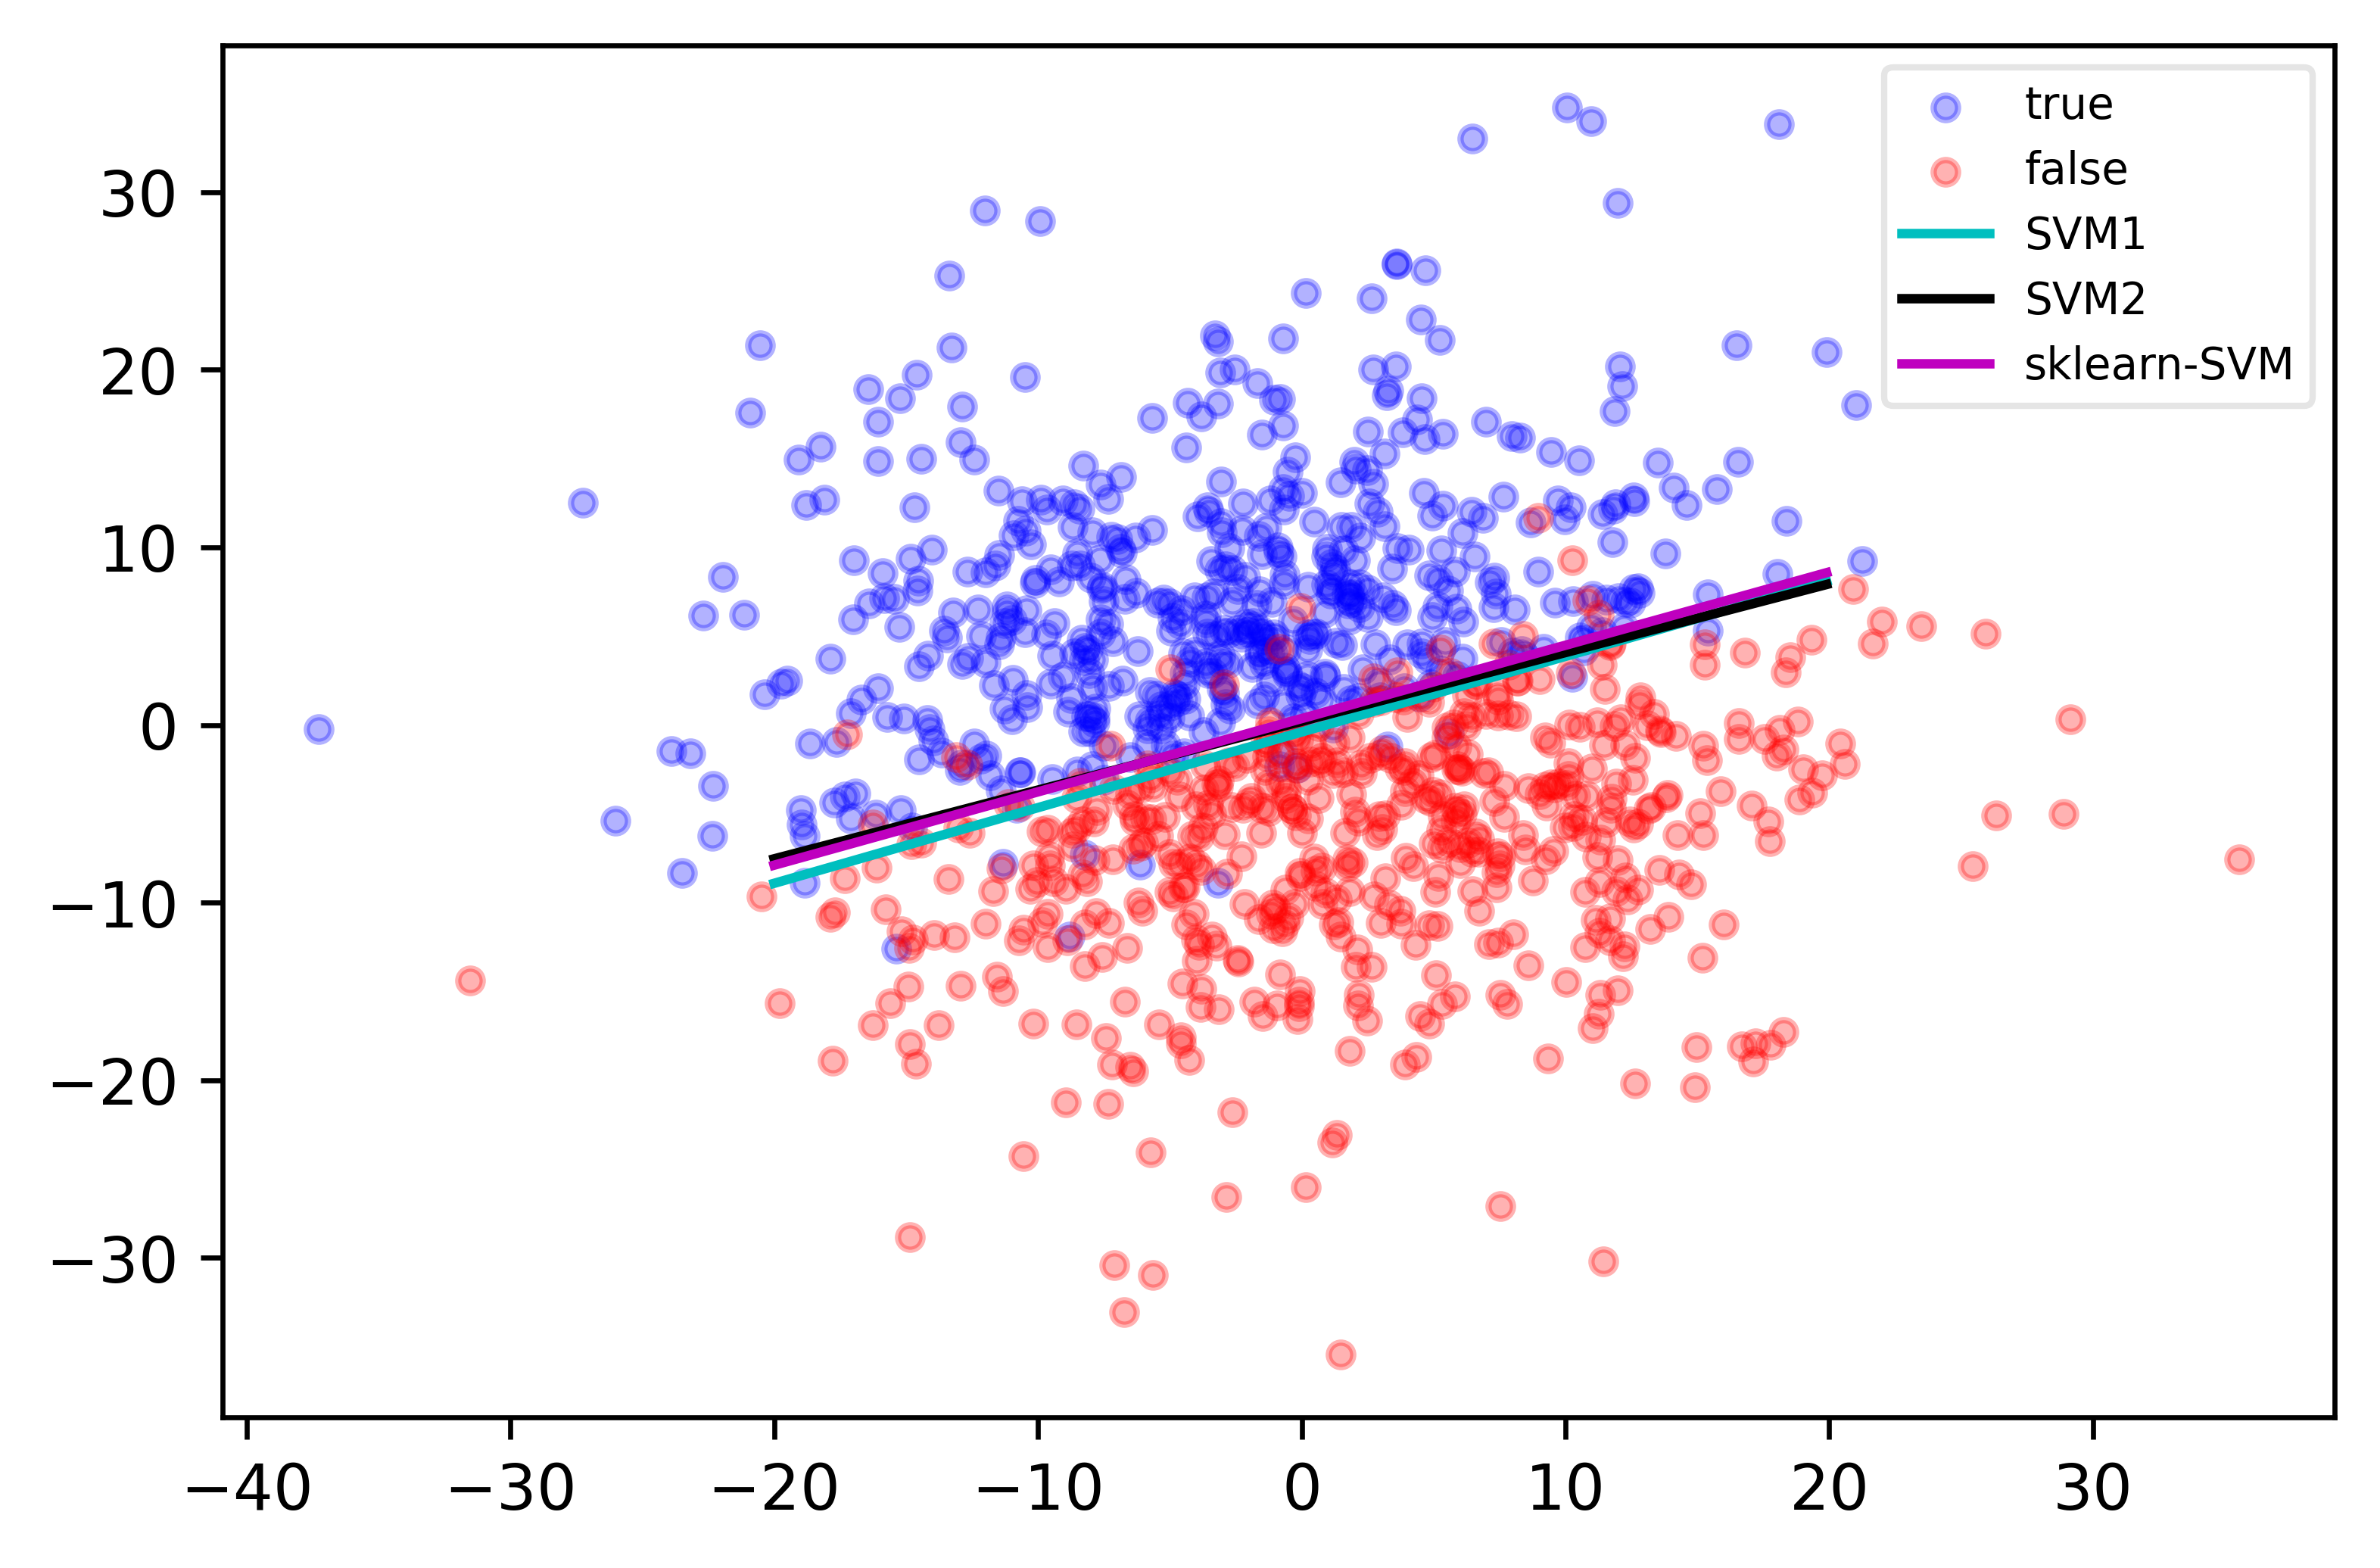

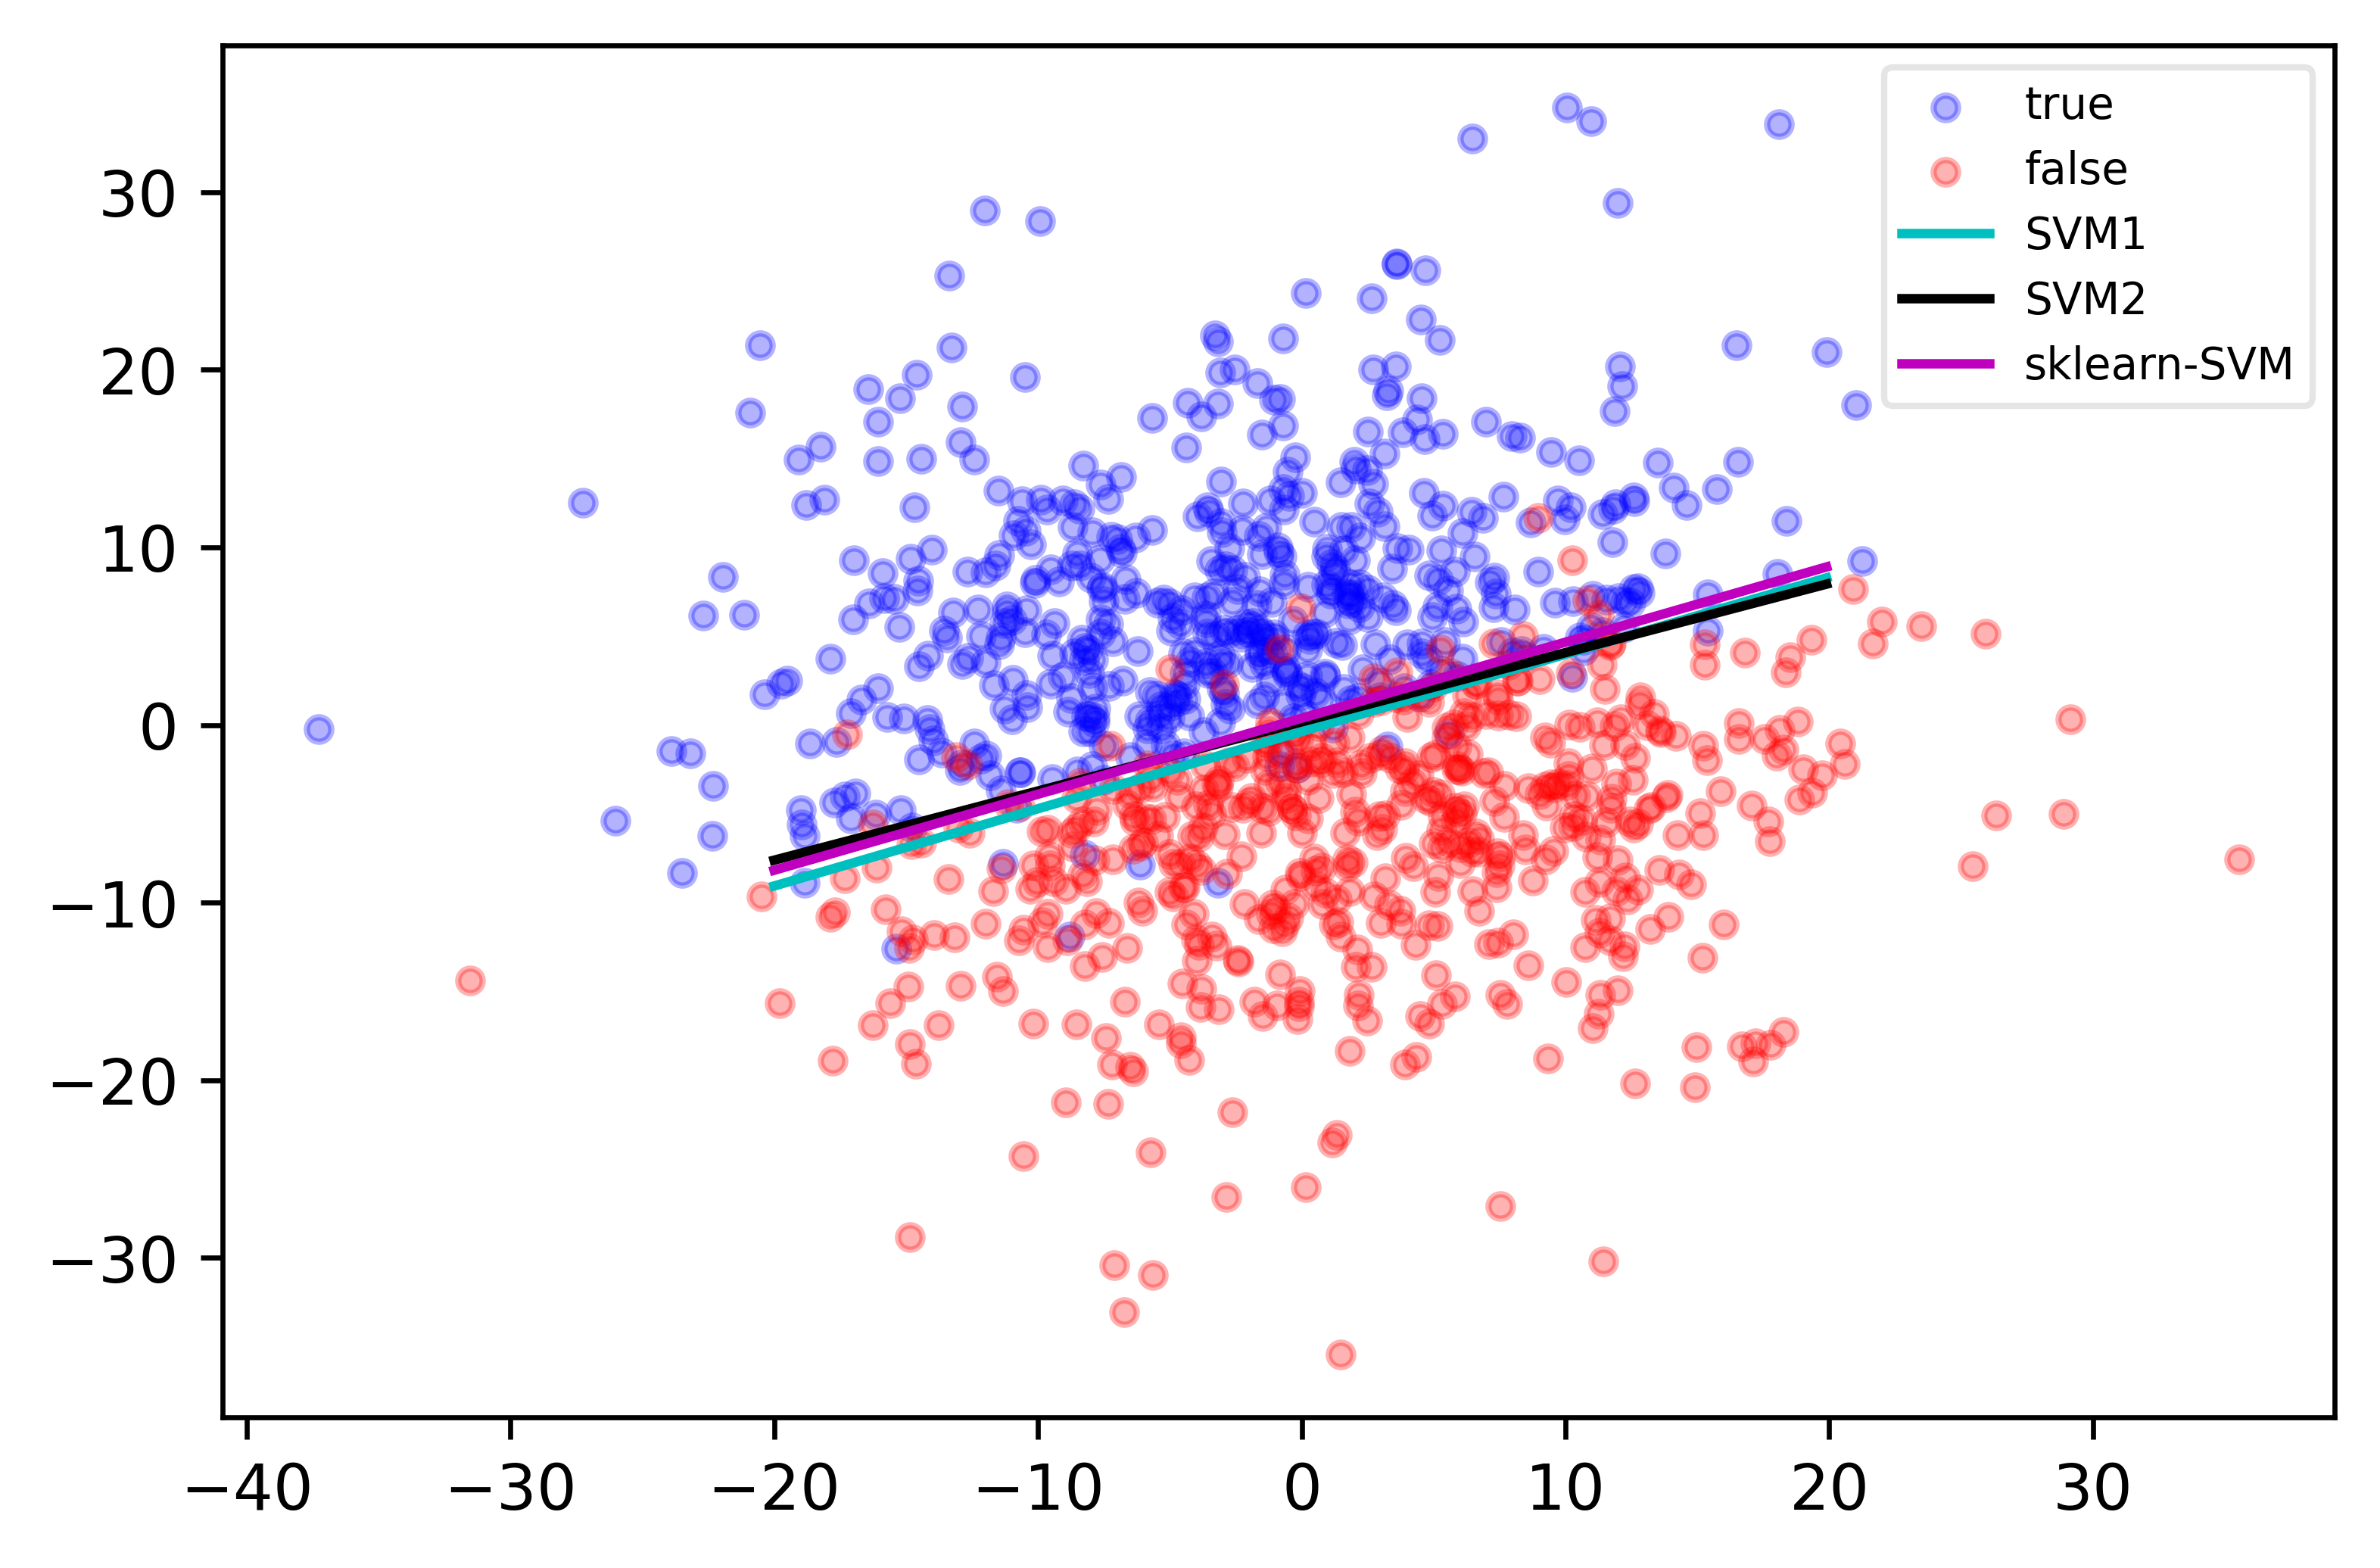

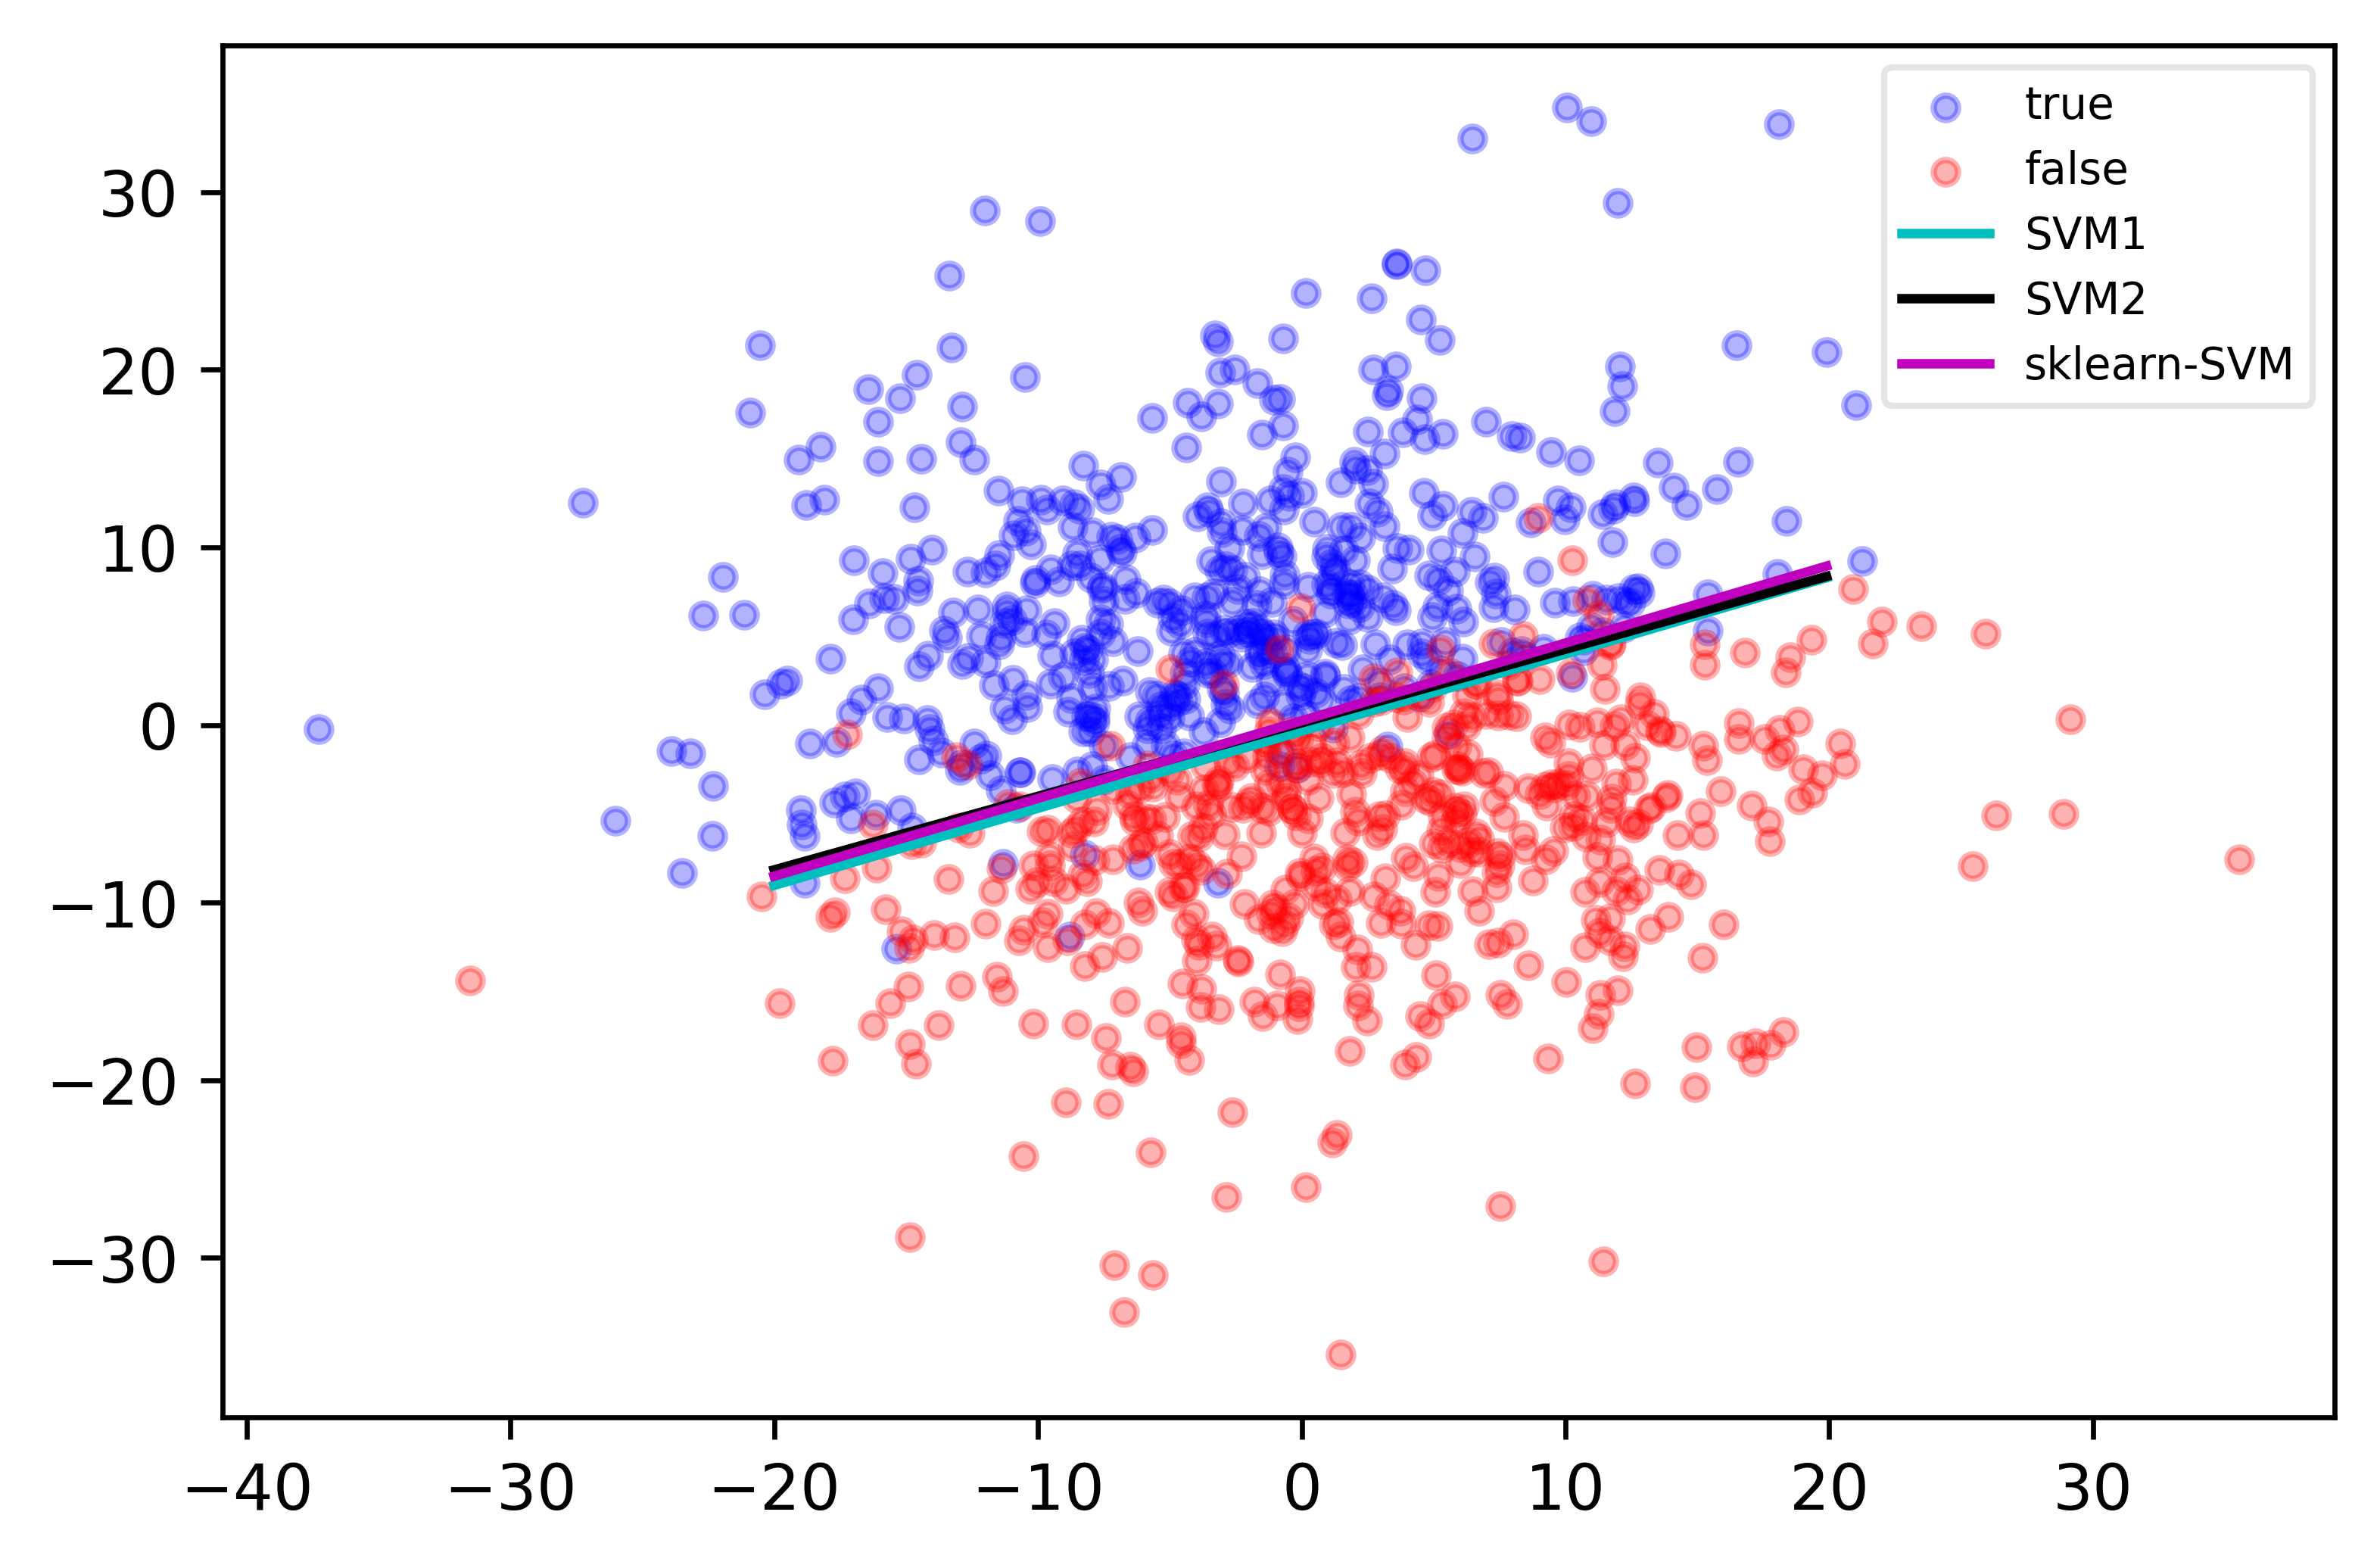

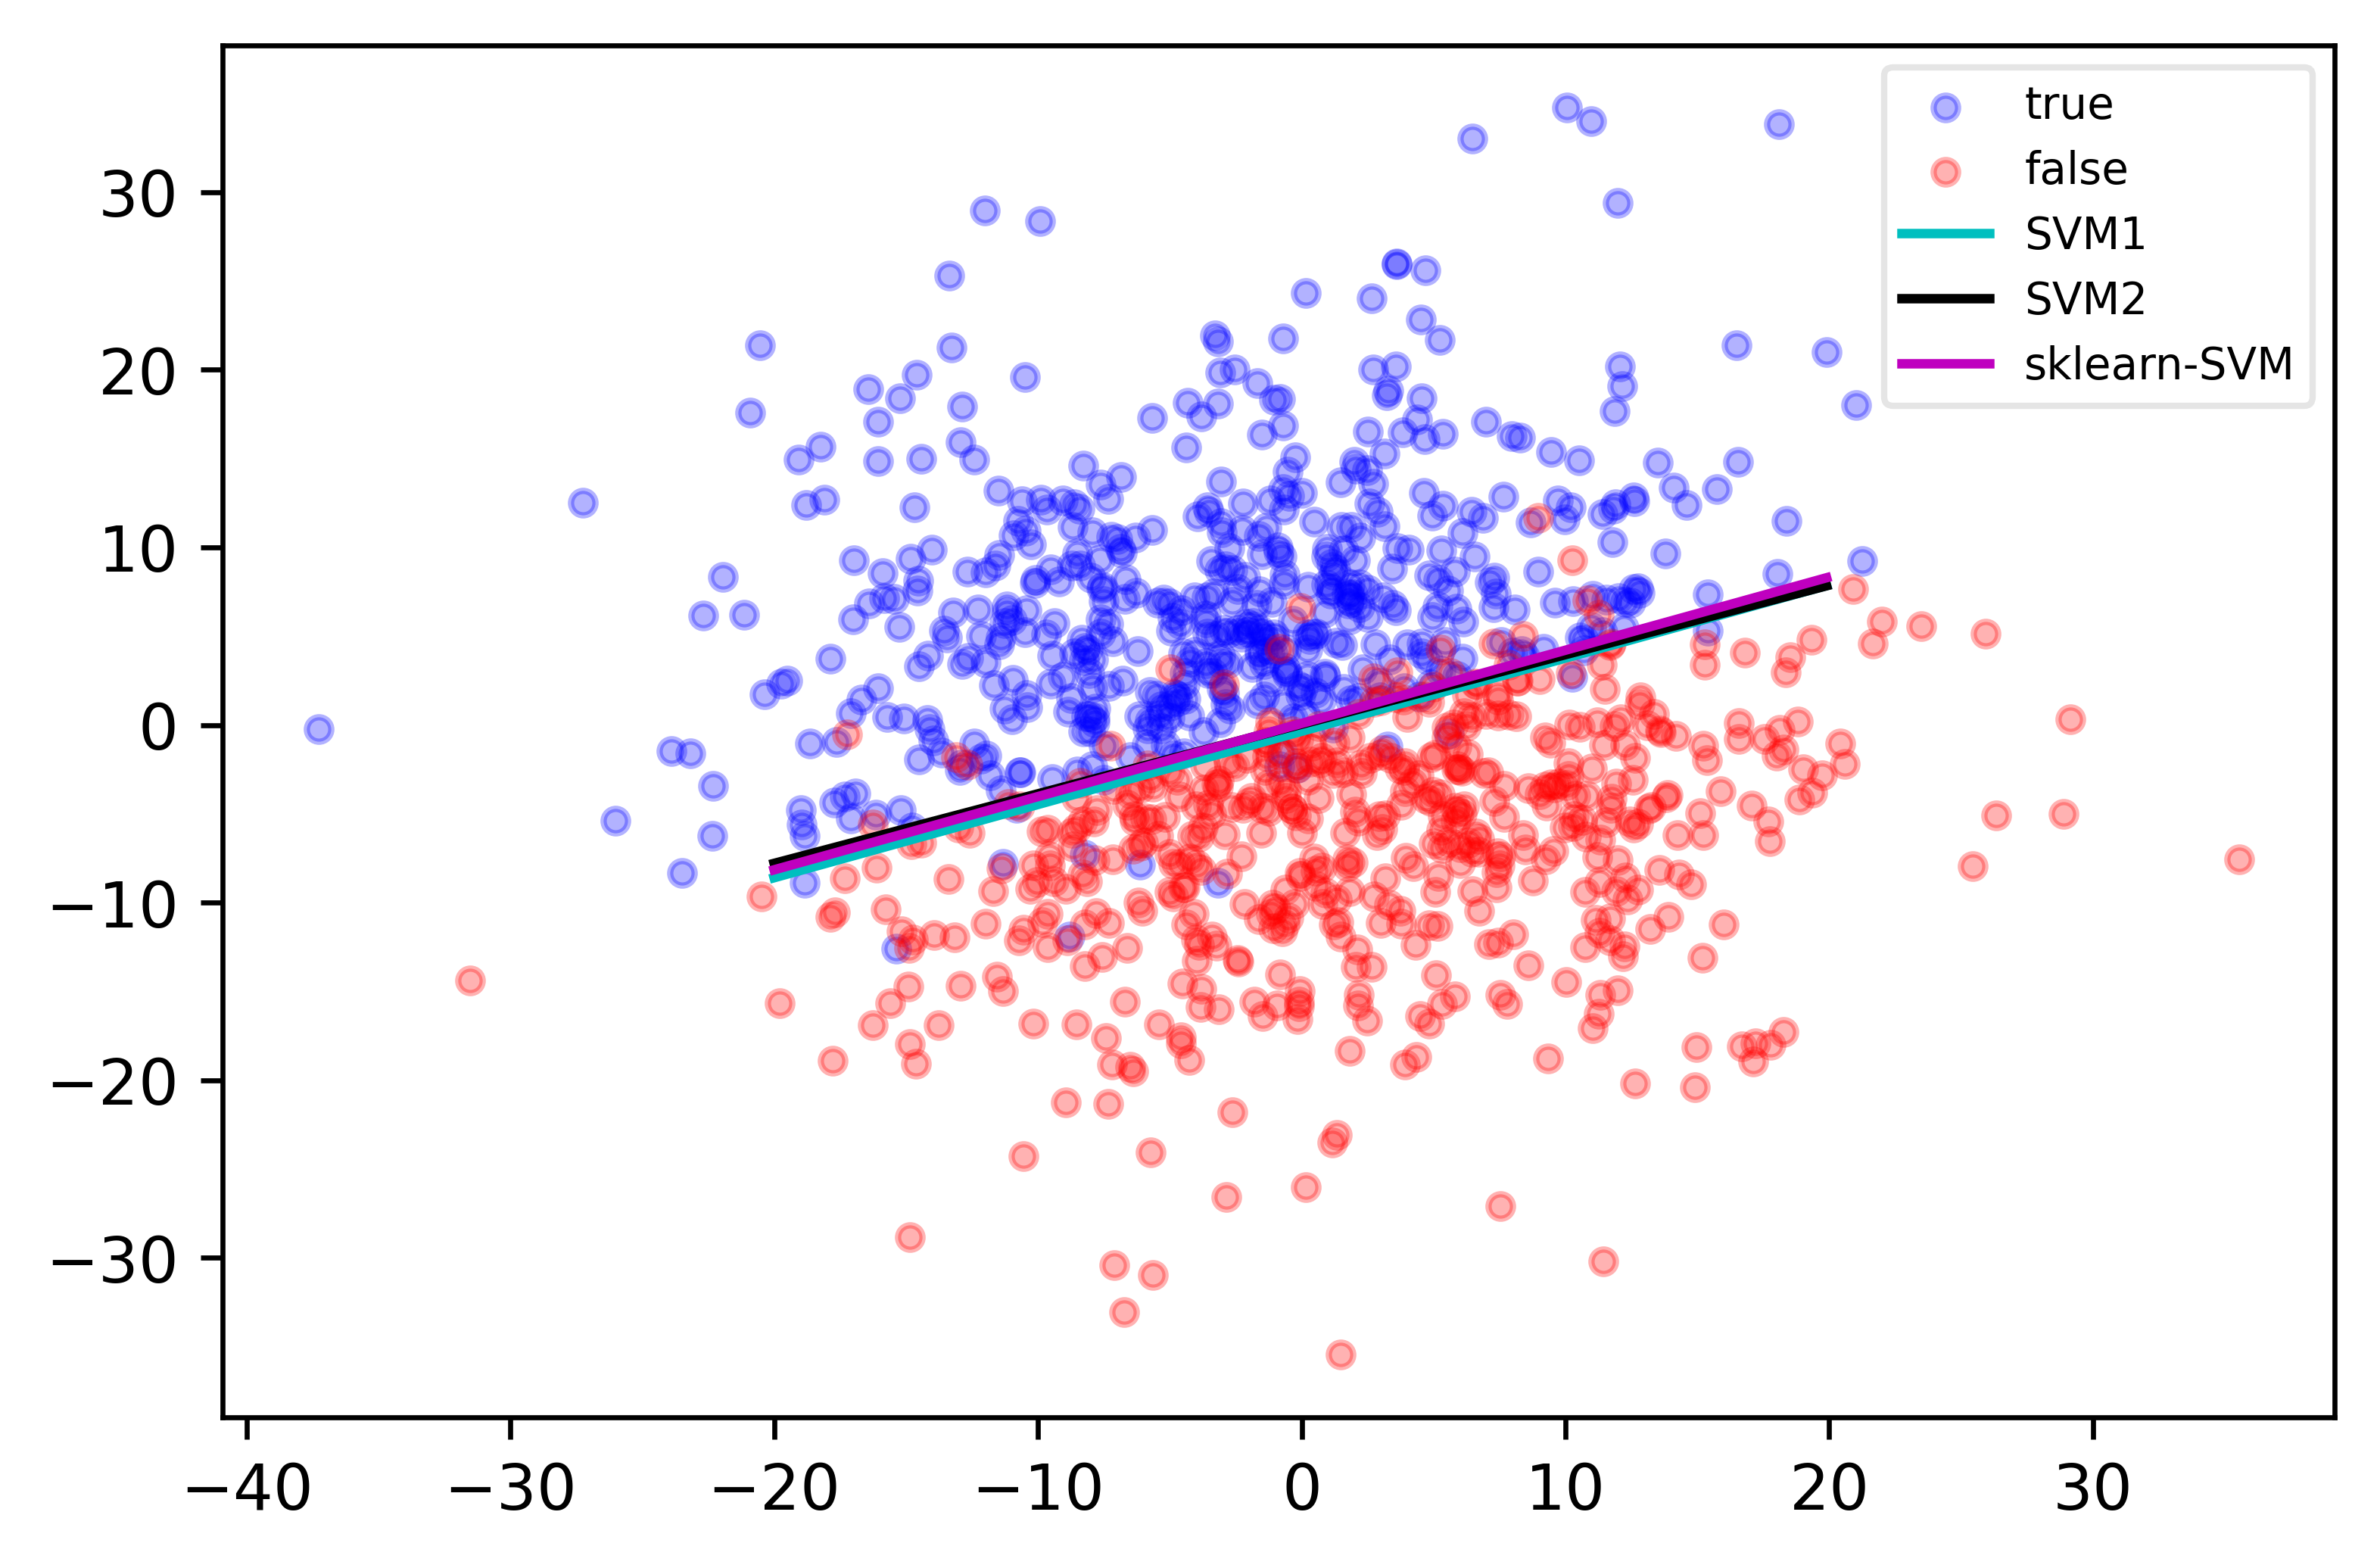

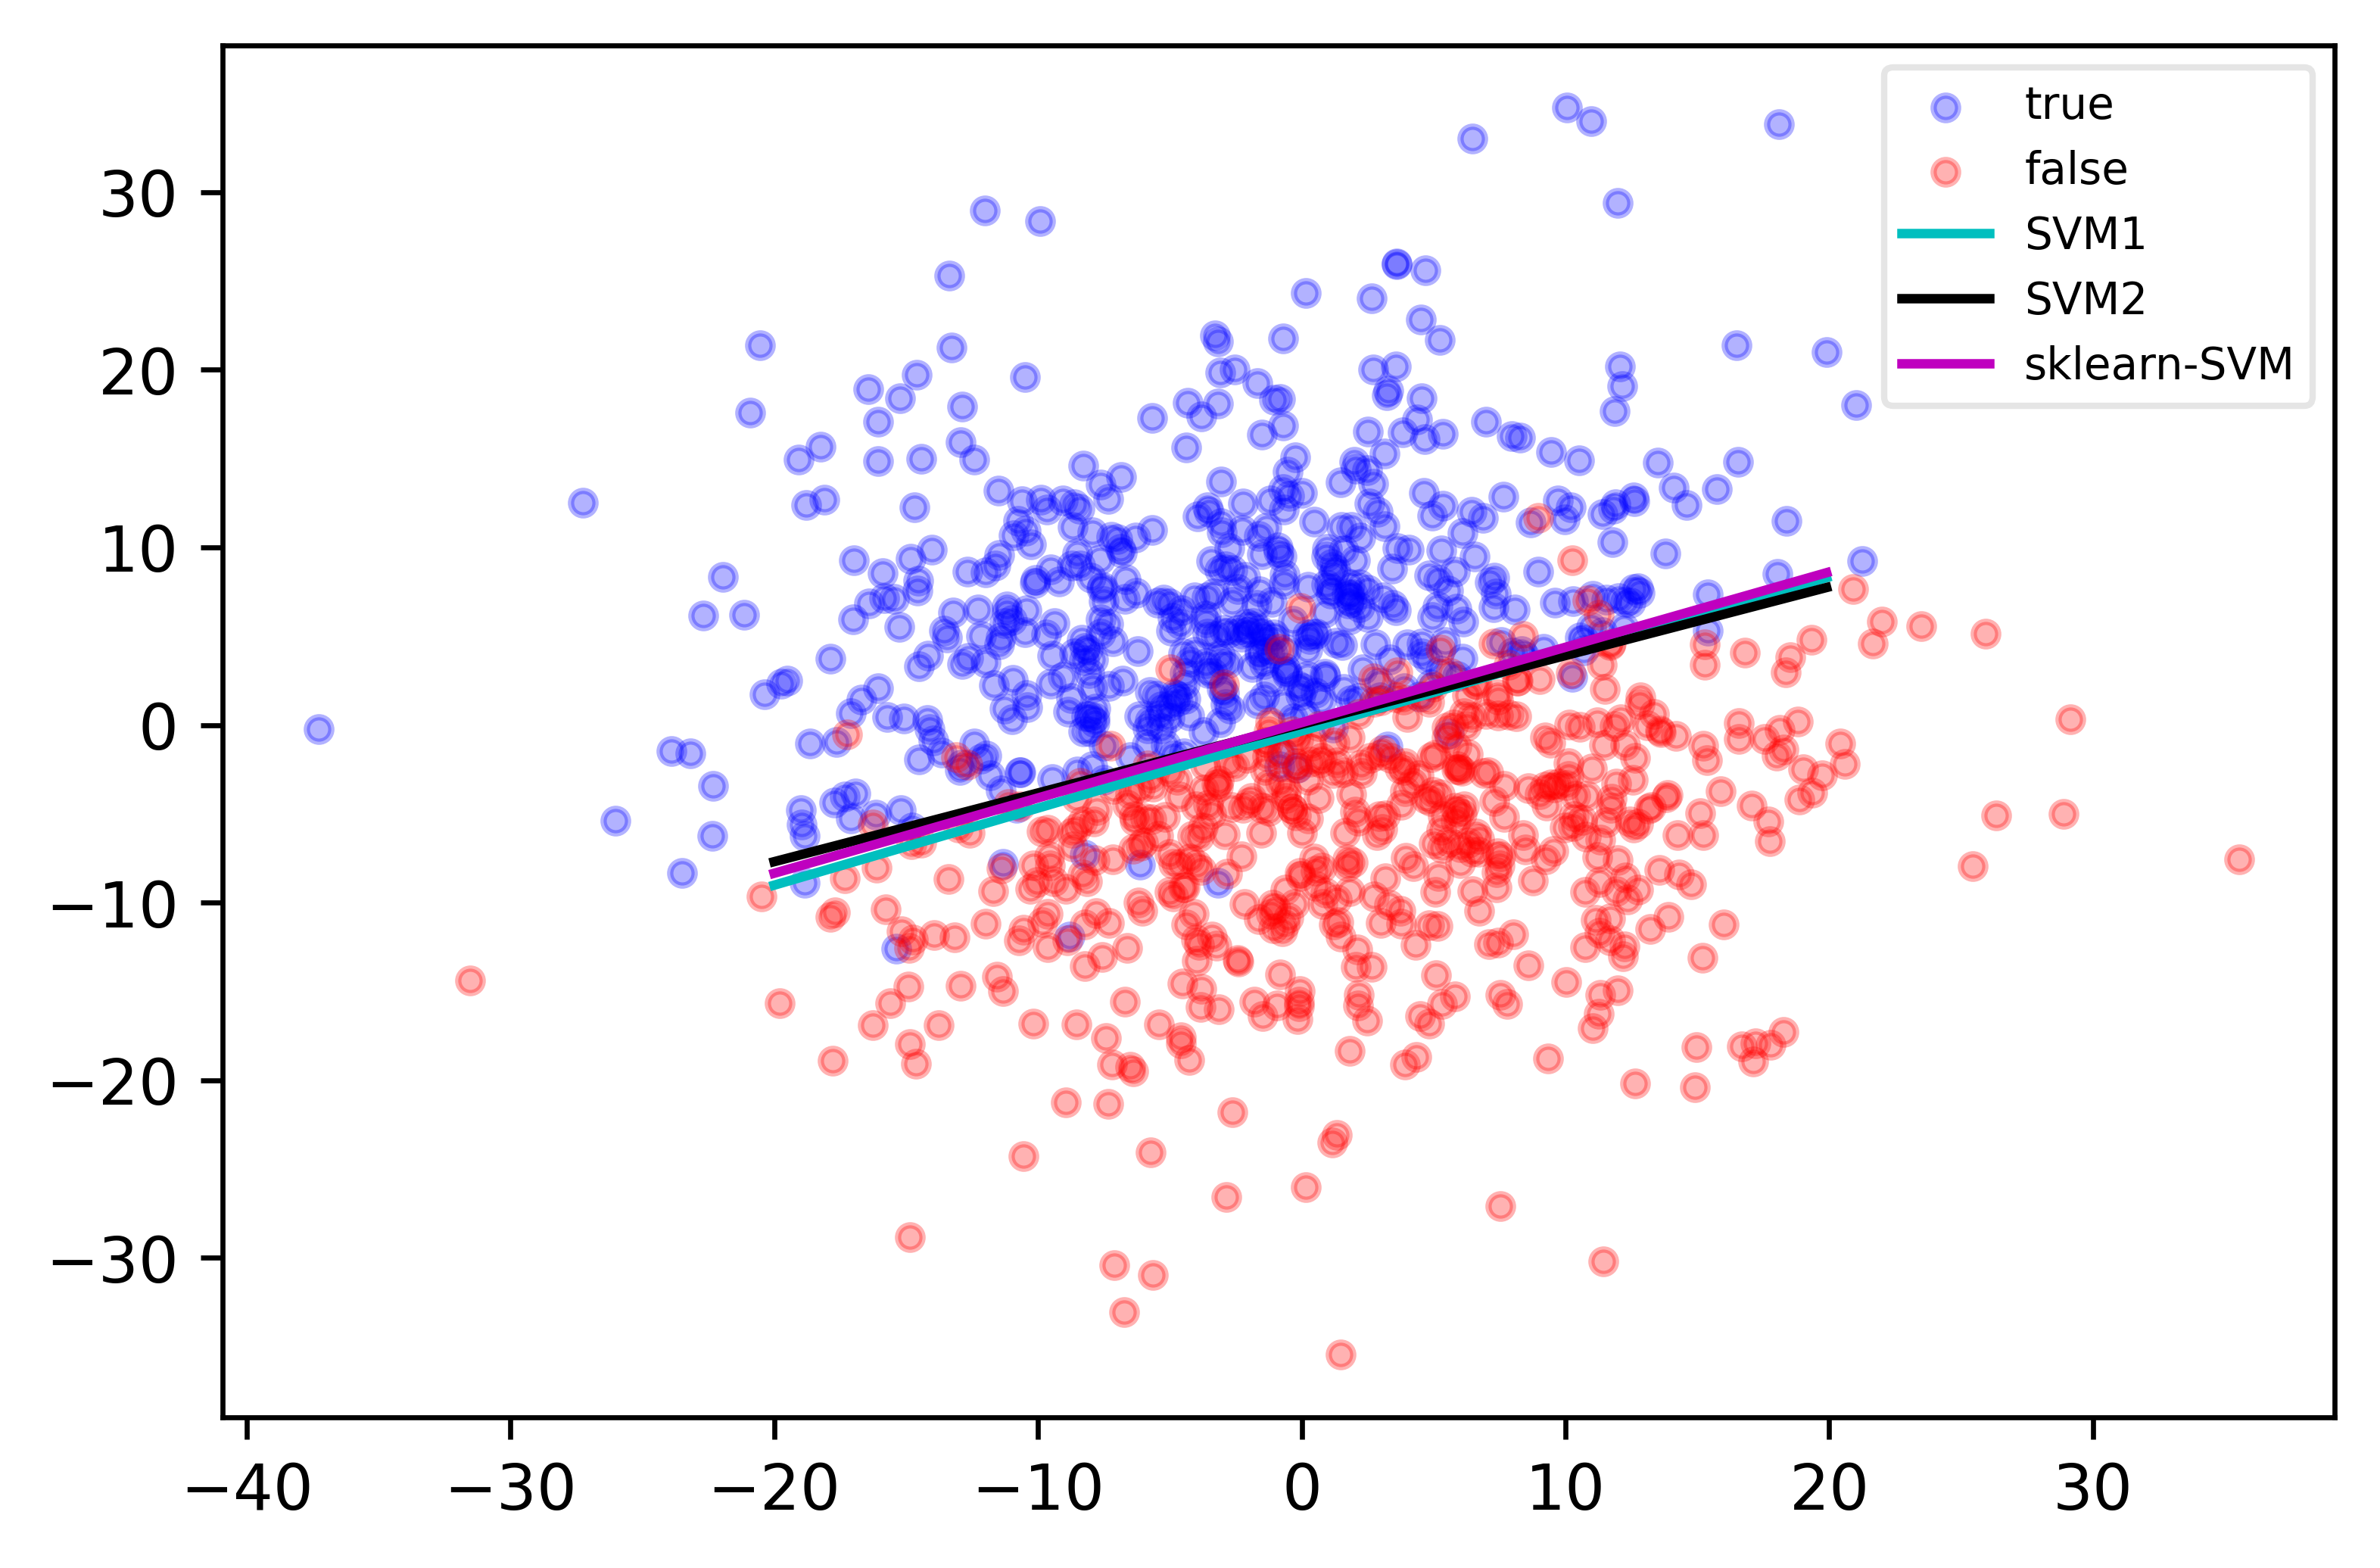

[0.97, 0.945, 0.95, 0.95, 0.92]
[0.97, 0.96, 0.96, 0.965, 0.92]
[0.97, 0.955, 0.95, 0.96, 0.92]


In [87]:
import matplotlib.pyplot as plt
acc1=[]
acc2=[]
acc3=[]
for a in range(5):
    list1 = [0,1,2,3,4]
    list1.remove(a)
    index = [list(range(int(dim[1]/5))),list(range(int(dim[1]/5),int(2*dim[1]/5))),list(range(int(2*dim[1]/5),int(3*dim[1]/5))),list(range(int(3*dim[1]/5),int(4*dim[1]/5))),list(range(int(4*dim[1]/5),int(5*dim[1]/5)))]
    train_index = np.concatenate([index[list1[0]], index[list1[1]], index[list1[2]], index[list1[3]]])
    X_train = X_data[train_index]
    y_train = y_data[train_index]
    X_test = X_data[index[a]]
    y_test = y_data[index[a]]
    model1 = SVM1(dim, 0.01)
    model1.fit(X_train, y_train)
    pred1 = model1.predict(X_test)
    count = 0
    for i in range(y_test.shape[0]):
        if y_test[i] == pred1[i]:
            count += 1
    acc1.append(count/y_test.shape[0])
    model2 = SVM2(dim, 0.02)
    model2.fit(X_train, y_train)
    pred2 = model2.predict(X_test)
    count = 0
    for i in range(y_test.shape[0]):
        if y_test[i] == pred2[i]:
            count += 1
    acc2.append(count/y_test.shape[0])
    linearsvc = LinearSVC(C=1.0, max_iter=1e7)
    linearsvc.fit(X_train, y_train.flatten())
    pred = linearsvc.predict(X_test)
    count = 0
    for i in range(y_test.shape[0]):
        if y_test[i] == pred[i]:
            count += 1
    acc3.append(count/y_test.shape[0])
    x1=[]
    x2=[]
    i=0
    for y in y_data:
        if y==1:
            x1.append(X_data[i])
        else:
            x2.append(X_data[i])
        i+=1
    x1=np.transpose(np.array(x1))
    x2=np.transpose(np.array(x2))
    x3=np.arange(-20,20,0.1)
    x3=np.array(x3)
    y3 = -(model1.w[0]*x3+model1.b)/model1.w[1]
    y4 = -(model2.w[0]*x3+model2.w[2])/model2.w[1]
    y5 = -(linearsvc.coef_[0][0]*x3+linearsvc.intercept_[0])/linearsvc.coef_[0][1]
    plt.figure(dpi=600)
    plt.scatter(x1[0], x1[1], s=15, c='b',alpha=0.3, label="true")
    plt.scatter(x2[0], x2[1], s=15, c='r',alpha=0.3, label="false")
    plt.plot(x3, y3, c='c',alpha=1, label="SVM1")
    plt.plot(x3, y4, c='k',alpha=1, label="SVM2")
    plt.plot(x3, y5, c='m',alpha=1, label="sklearn-SVM")
    plt.legend(loc="upper right", framealpha=0.5, fontsize="x-small")
    plt.show()
    plt.show()
print(acc1)
print(acc2)
print(acc3)